In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import joblib


diabetes_data = pd.read_csv("diabetes.csv")

diabetes_data = diabetes_data.fillna(value=np.nan)
diabetes_data.loc[diabetes_data['Pregnancies'] < 0, 'Pregnancies'] = 0
diabetes_data.loc[diabetes_data['Age'] < 0, 'Age'] = 0

imputer = SimpleImputer(strategy='median')
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Pregnancies','Age']] = imputer.fit_transform(diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Pregnancies','Age']])


# Normalize numerical features
scaler = StandardScaler()
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Pregnancies','Age']] = scaler.fit_transform(diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Pregnancies','Age']])

# Split the dataset into features and target variable
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)

# Define hyperparameters grid for logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Re-train the model with the optimized hyperparameters
optimized_model = grid_search.best_estimator_
optimized_model.fit(X_train, y_train)

joblib.dump(optimized_model, 'model.pkl')


['model.pkl']

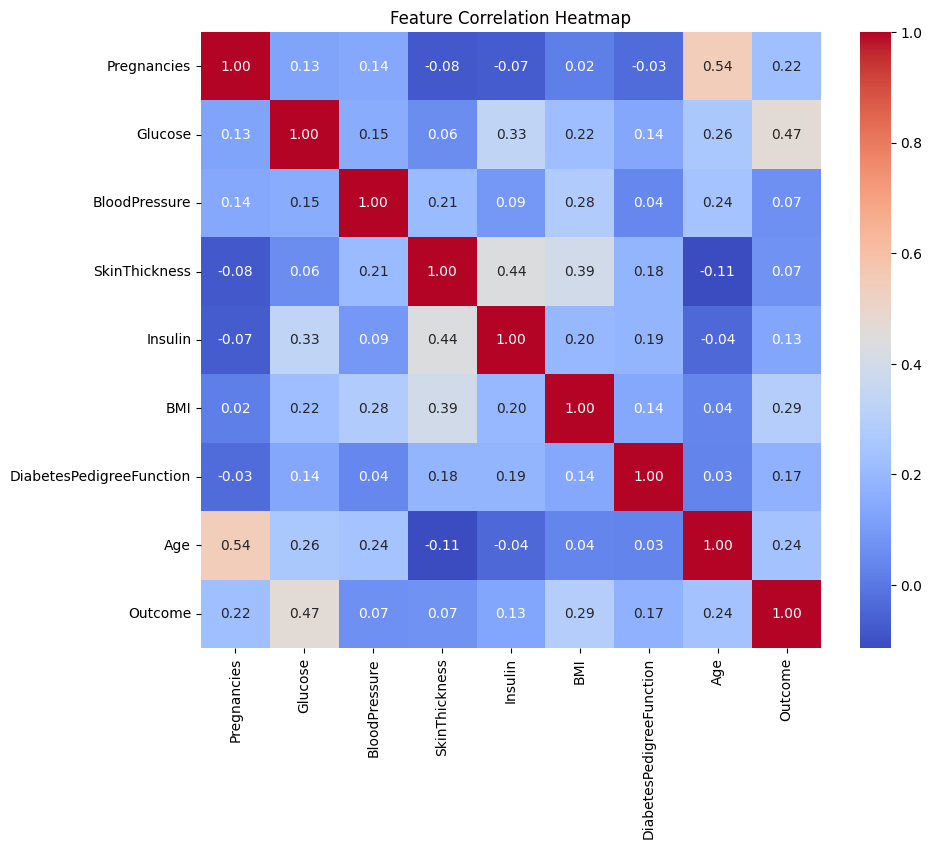

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0)
plt.title("Feature Correlation Heatmap")
plt.show()


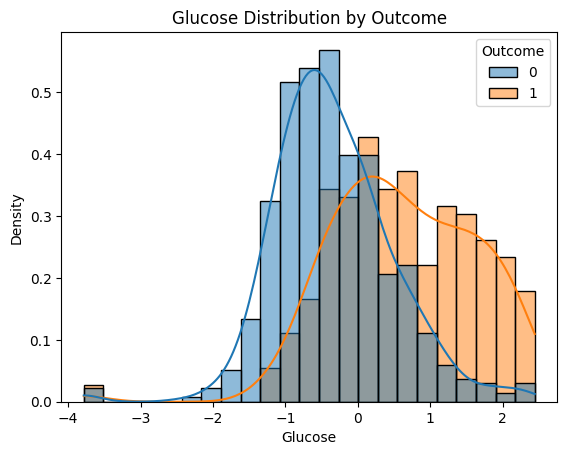

In [3]:
sns.histplot(data=diabetes_data, x='Glucose', hue='Outcome', kde=True, stat="density", common_norm=False)
plt.title('Glucose Distribution by Outcome')
plt.show()

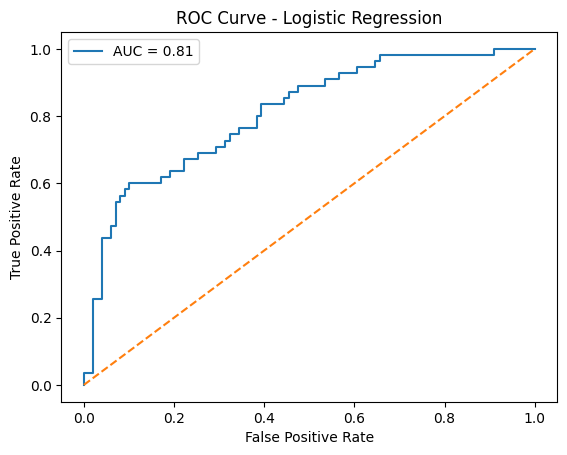

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = optimized_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


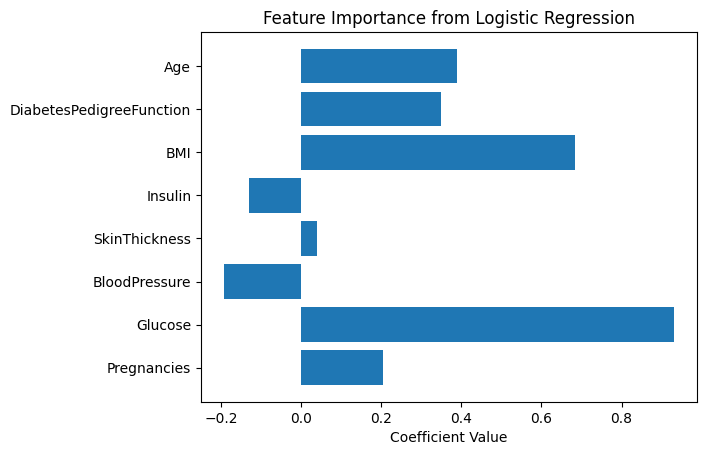

In [ ]:

coefficients = optimized_model.coef_[0]
features = X.columns

plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance from Logistic Regression')
plt.show()


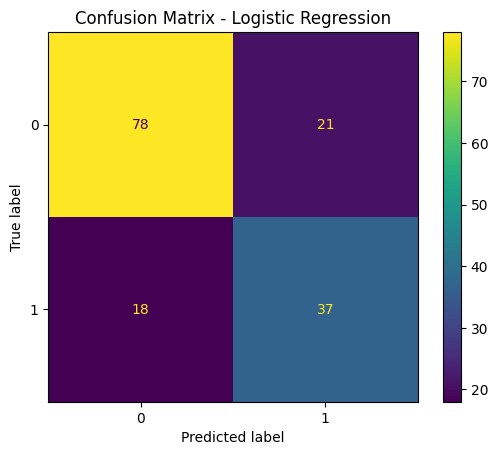

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=optimized_model.classes_)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


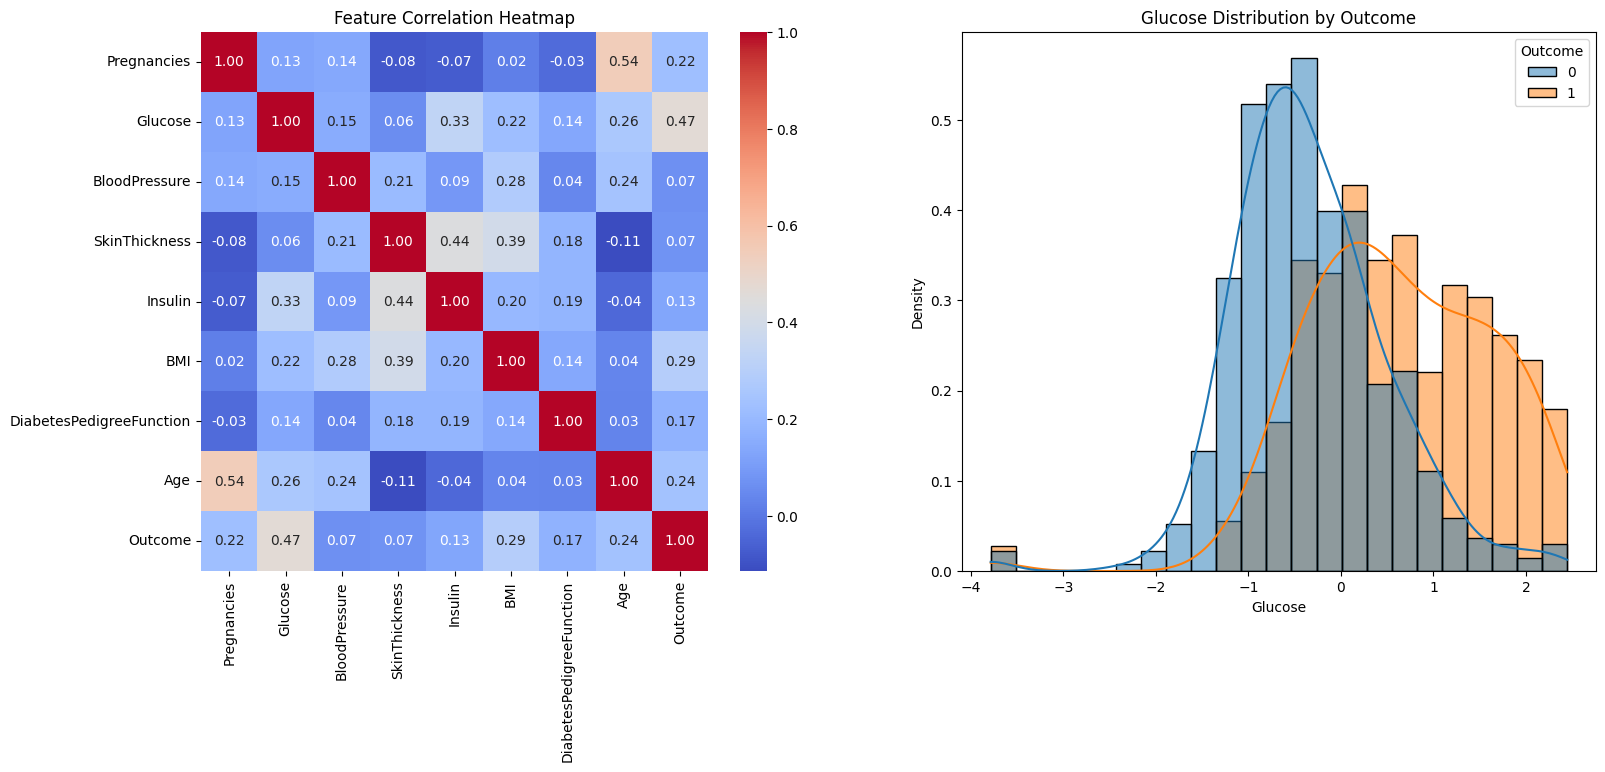

<Figure size 640x480 with 0 Axes>

In [10]:

fig, axes = plt.subplots(1, 2, figsize=(18, 7))  # 1 row, 2 columns

sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0, ax=axes[0])
axes[0].set_title("Feature Correlation Heatmap")


sns.histplot(data=diabetes_data, x='Glucose', hue='Outcome', kde=True, stat="density", common_norm=False)
plt.title('Glucose Distribution by Outcome')
plt.show()
plt.tight_layout()
plt.show()
